In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [43]:
#Загрузите файл HR.csv в pandas dataframe
file_url = 'https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1'
df_hr = pd.read_csv(file_url)
df_hr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [44]:
#Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [45]:
modes = df_hr.mode()

for column in modes.columns:
    print(f"{column}: {', '.join(map(str, modes[column].dropna().unique()))}")

satisfaction_level: 0.1
last_evaluation: 0.55
number_project: 4.0
average_montly_hours: 135, 156
time_spend_company: 3.0
Work_accident: 0.0
left: 0.0
promotion_last_5years: 0.0
department: sales
salary: low


In [46]:
"""Рассчитать и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные."""
df_hr_selected = df_hr.drop(['department', 'salary'], axis=1)
corr = df_hr_selected.corr()

<Axes: >

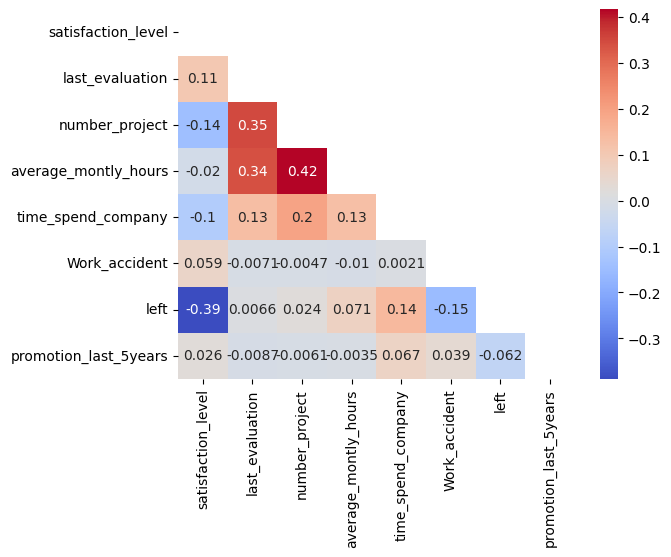

In [47]:
matrix = np.triu(df_hr_selected.corr())
sns.heatmap(df_hr_selected.corr(), annot=True, cmap='coolwarm', mask=matrix)



Анализируя тепловую карту, можем сделать вывод о том, что наиболее скоррелированными переменнами являются: average_montly_hours и number_project. Наименее скоррелированными: Work_accident и time_spend_company

In [48]:
#Рассчитайте сколько сотрудников работает в каждом департаменте.
df_work = df_hr.loc[(df_hr.left == 0)]
df_work.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [49]:
df_employee = df_work[['department','left']].groupby('department').count().reset_index().sort_values('left', ascending = False)
df_employee.rename(columns={'left': 'employee'}, inplace=True)
df_employee.head(50)

,department,employee
7,sales,3126
9,technical,2023
8,support,1674
0,IT,954
6,product_mng,704
1,RandD,666
5,marketing,655
2,accounting,563
4,management,539
3,hr,524


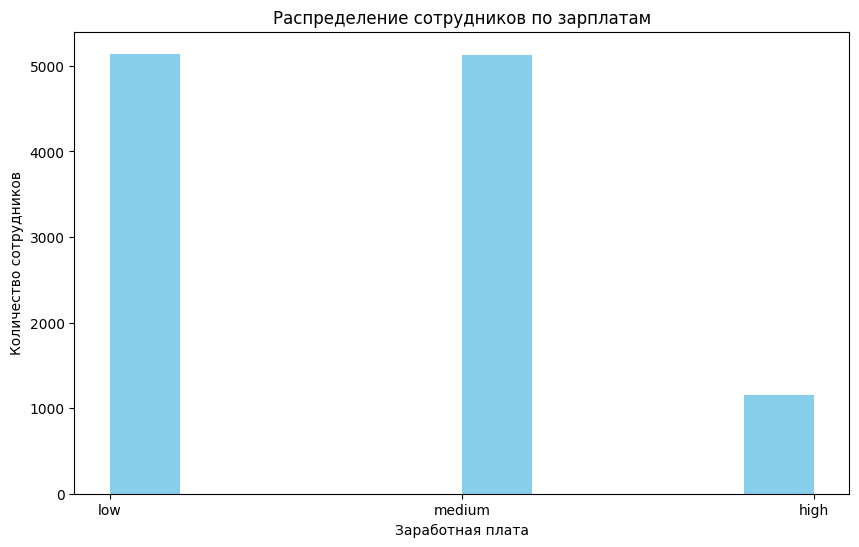

In [50]:
#Показать распределение сотрудников по зарплатам.
plt.figure(figsize=(10, 6))
plt.hist(df_work['salary'], bins=10, color='skyblue')
plt.xlabel('Заработная плата')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам')
plt.show()

In [51]:
#Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
df_grouped = df_work.groupby(['department', 'salary']).size().unstack()
df_grouped.head()


salary,high,low,medium
department,,,
IT,79,437,438
RandD,47,309,310
accounting,69,259,235
hr,39,243,242
management,224,121,194


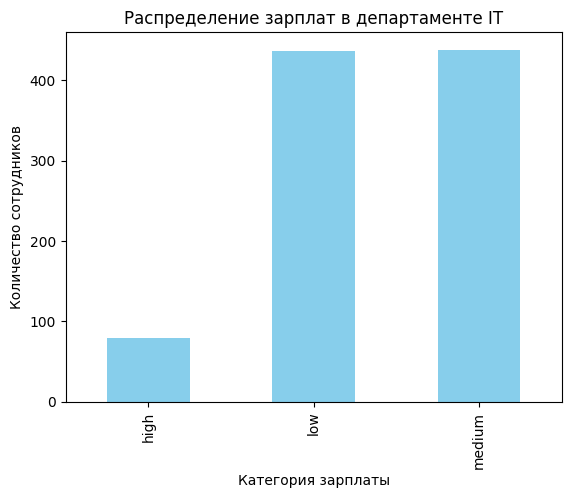

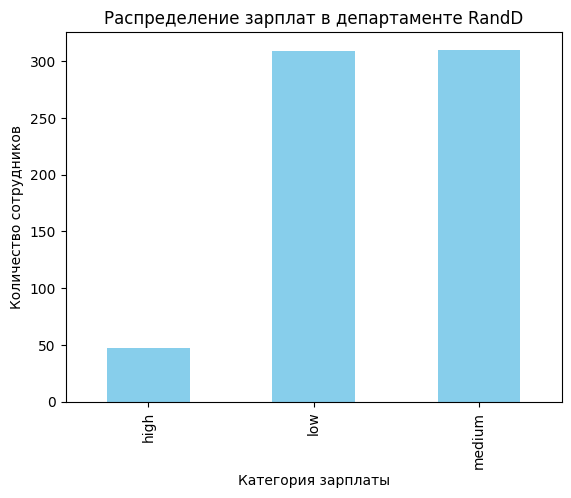

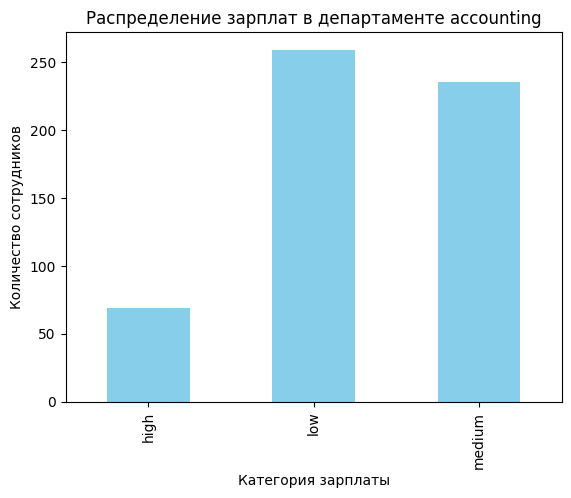

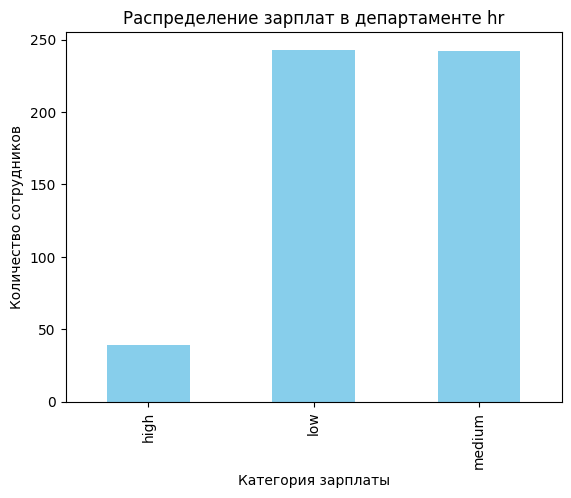

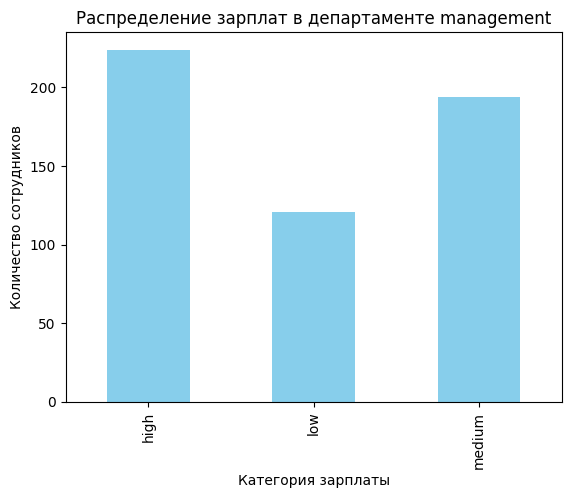

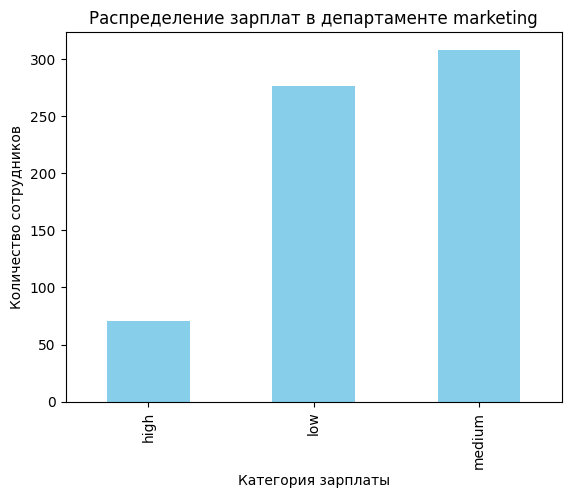

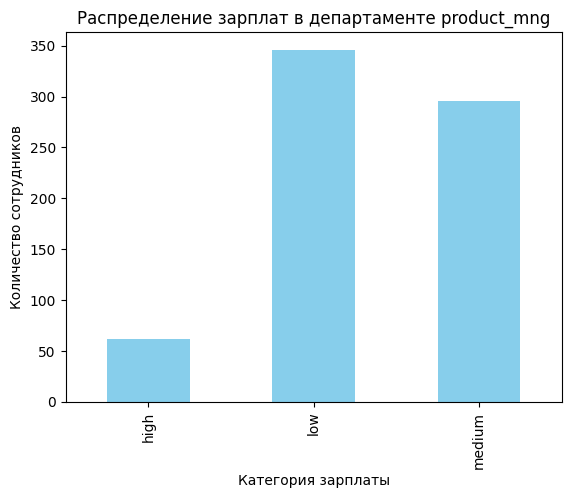

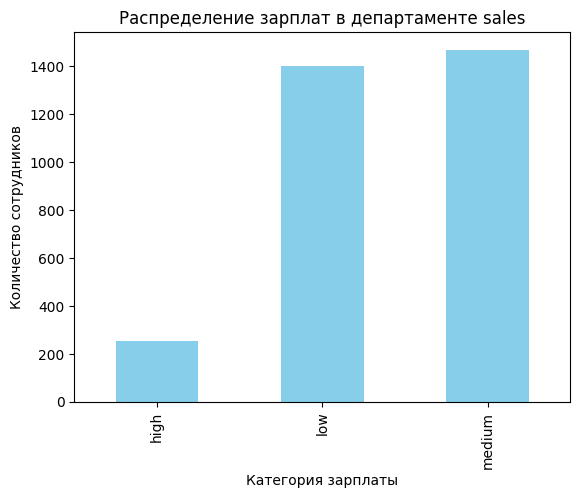

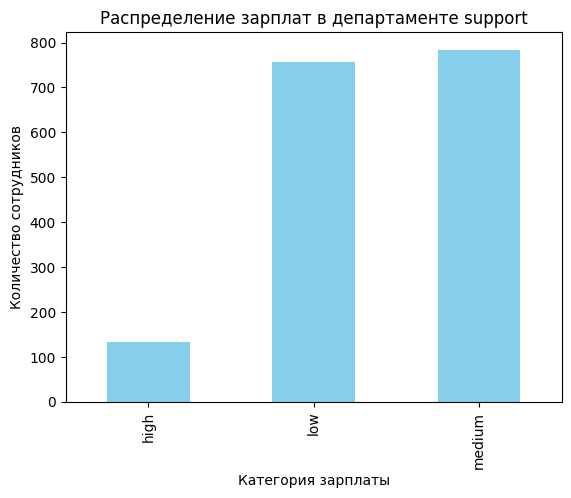

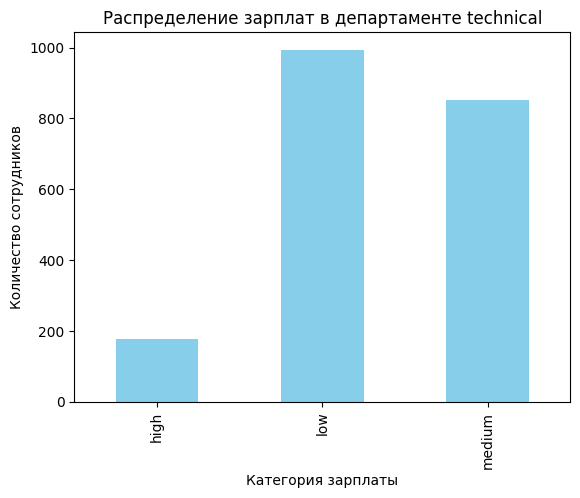

In [52]:
for department in df_grouped.index:
    department_data = df_grouped.loc[department].dropna()
    department_data.plot(kind='bar', color='skyblue')
    plt.title(f'Распределение зарплат в департаменте {department}')
    plt.xlabel('Категория зарплаты')
    plt.ylabel('Количество сотрудников')
    plt.show()

In [ ]:
"""Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким
окладом"""
# Делим на 2 группы: низкий оклад и высокий
high_salary = df_work[df_work['salary'] == 'high']['average_montly_hours']
low_salary = df_work[df_work['salary'] == 'low']['average_montly_hours']

# Проводим t-тест
t_stat, p_value = stats.ttest_ind(high_salary, low_salary, equal_var=False)
#H0: Нет разницы между количеством часов, проведенных на работе, и уровнем заработной платы
#H1: Есть разница между количеством часов, проведенных на работе, и уровнем заработной платы
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу H0")
else:
    print("Нет оснований отвергнуть нулевую гипотезу H0")
    print(p_value)


Нет оснований отвергнуть нулевую гипотезу H0
0.25185710427140806


In [ ]:
"""Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов"""


promotion_rate = df_hr.groupby('left')['promotion_last_5years'].count().apply(lambda x: x/len(df_hr))
satisfaction_mean = df_hr.groupby('left')['satisfaction_level'].mean()
projects_mean = df_hr.groupby('left')['number_project'].mean()

print("Доля сотрудников с повышением за последние 5 лет:")
print(promotion_rate)
print("\nСредняя степень удовлетворенности:")
print(satisfaction_mean)
print("\nСреднее количество проектов:")
print(projects_mean)

Доля сотрудников с повышением за последние 5 лет:
left
0    0.761917
1    0.238083
Name: promotion_last_5years, dtype: float64

Средняя степень удовлетворенности:
left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

Среднее количество проектов:
left
0    3.786664
1    3.855503
Name: number_project, dtype: float64


In [ ]:
"""Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки"""

X = df_hr.drop(columns=['left', 'department','salary'])
y = df_hr['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Точность модели:", accuracy)


Точность модели: 0.7533333333333333
